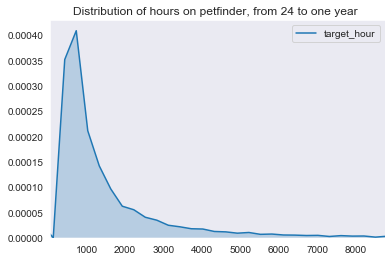

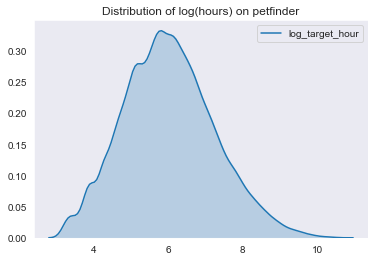

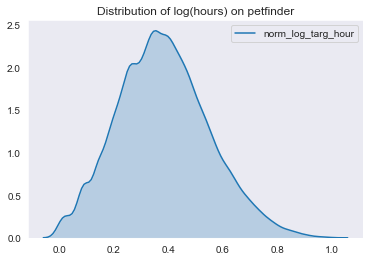

In [39]:
import pandas as pd
import numpy as np

chidat = pd.read_csv("Chicago_adopted_20k_Jan_21.csv") 
stldat = pd.read_csv("StL_adopted_20k_Jan_21.csv")
inddat = pd.read_csv("Indy_adopted_20k_Jan_21.csv")

petdat = pd.concat([chidat, stldat, inddat])

#reformat dates and calculate difference in dates (= target variable)

fmt ='%Y-%m-%dT%H:%M:%S+0000'
petdat['published_at'] =  pd.to_datetime(petdat['published_at'], format=fmt)
petdat['status_changed_at'] =  pd.to_datetime(petdat['status_changed_at'], format=fmt)
petdat['time_diff'] = petdat['status_changed_at'] - petdat['published_at']
petdat['target_hour'] = petdat.time_diff.astype('timedelta64[h]')

#take only dogs that were there for more than 1 day
petdat = petdat[petdat['target_hour'] > 24] 
petdat['log_target_hour'] = np.log(petdat['target_hour'])


def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

petdat['norm_log_targ_hour'] = normalize(petdat.log_target_hour)


#Make some density plots

import matplotlib.pyplot as plt
import seaborn as sns
df = petdat

sns.set_style("dark")
g = sns.kdeplot(df['target_hour'], shade=True)
plt.xlim(left = 48,right=8760)
plt.title("Distribution of hours on petfinder, from 24 to one year ")
plt.show(g)

sns.set_style("dark")
h = sns.kdeplot(df['log_target_hour'], shade=True)

plt.title("Distribution of log(hours) on petfinder")
plt.show(h)


sns.set_style("dark")
h = sns.kdeplot(df['norm_log_targ_hour'], shade=True)
plt.title("Distribution of log(hours) on petfinder")
plt.show(h)




Text(0.5, 1, 'Distribution of hours on petfinder, by gender,first three months ')

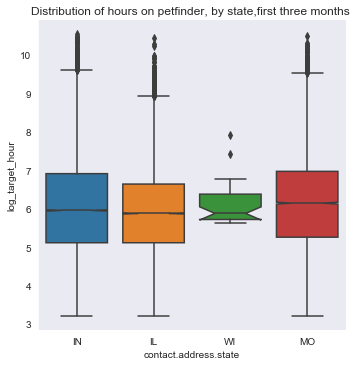

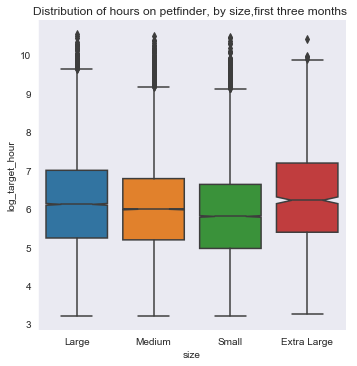

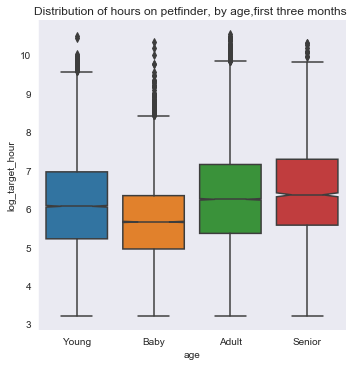

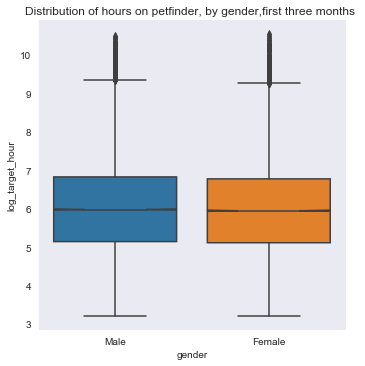

In [47]:

# plot
sns.catplot(x="contact.address.state", y="log_target_hour", kind="box", notch = True, data=df);
plt.title("Distribution of hours on petfinder, by state,first three months ")
#plt.ylim(0,2190)

sns.catplot(x="size", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("Distribution of hours on petfinder, by size,first three months ")
#plt.ylim(0,2190)

sns.catplot(x="age", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("Distribution of hours on petfinder, by age,first three months ")
#plt.ylim(0,2190)

sns.catplot(x="gender", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("Distribution of hours on petfinder, by gender,first three months ")
#plt.ylim(0,2190)
